# Forecast wind turbine production

In [1]:
!pip install prophet

In [2]:
import pandas as pd

## Load Data

In [3]:
import pandas as pd
df = pd.read_csv('data_turbine.csv')
df = df.rename(columns={'Date/Time': 'ds', 'LV ActivePower (kW)': 'y'})
df["ds"] = pd.to_datetime(df["ds"],format='%d %m %Y %H:%M')
df = df.set_index("ds")
df = df.resample('1h').agg({'y': 'mean'}).reset_index()

## EDA

In [10]:
df.describe()

,ds,y
count,8760,8439.000000
mean,2018-07-02 11:30:00,1305.538104
min,2018-01-01 00:00:00,-0.179522
25%,2018-04-02 05:45:00,78.101053
50%,2018-07-02 11:30:00,846.697019
75%,2018-10-01 17:15:00,2439.734049
max,2018-12-31 23:00:00,3604.410034
std,NaN,1291.344667


<Axes: >

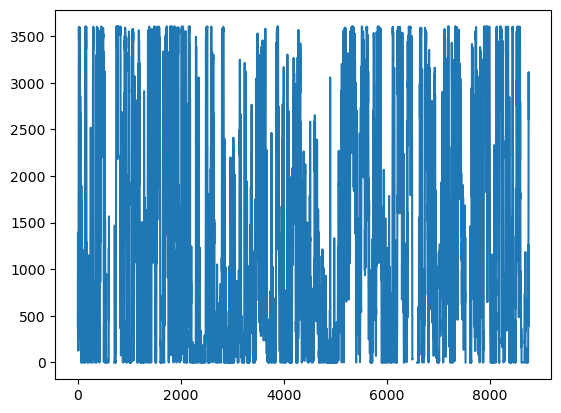

In [5]:
df['y'].plot()

## Model

In [6]:
from prophet import Prophet
period = int(12) # hours
m = Prophet()
m.fit(df[:-1*period])

Importing plotly failed. Interactive plots will not work.
13:11:50 - cmdstanpy - INFO - Chain [1] start processing
13:11:52 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=period,freq='h',include_history=False)
forecast = m.predict(future)

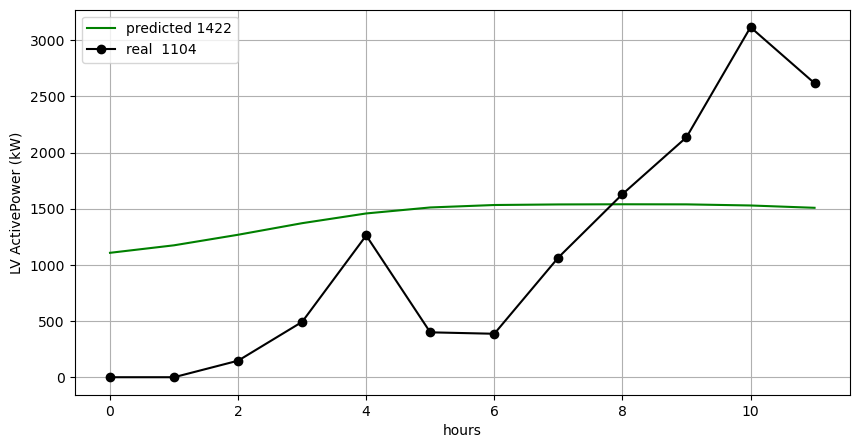

In [8]:
# Python
import matplotlib.pyplot as plt
y_hat= forecast[['yhat']].values
y_test = df[-1*period:][["y"]].values

plt.figure(figsize=(10,5))
plt.plot(y_hat,'g', label=f"predicted {int(y_hat.mean())}")
plt.plot(y_test,'ko-', label=f"real  {int(y_test.mean())}")
plt.legend()
plt.xlabel('hours')
plt.ylabel('LV ActivePower (kW)')
plt.grid()
plt.show()

In [9]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat)

0.07098051416160311